In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [130]:
# Importing the data
df_unscaled = pd.read_csv(r'C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\unscaled_cleaned.csv')
df_answers = pd.read_csv(r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [131]:
# We convert the date to time

df_unscaled['DATE'] = pd.to_datetime(df_unscaled['DATE'], format='%Y%m%d')
df_answers['DATE'] = pd.to_datetime(df_answers['DATE'], format='%Y%m%d')

In [132]:
# Reducing data to 90s decade
answers_90 = df_answers[df_answers['DATE'].astype(str).str.contains('199')]
unscaled_90 = df_unscaled[df_unscaled['DATE'].astype(str).str.contains('199')]

## Data cleaning

In [133]:
df_answers_90 = answers_90.drop('DATE', axis=1)

In [135]:
df_answers_90.shape

(3652, 15)

In [136]:
df_answers_90.head()

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
10958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10962,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [138]:
df_answers_90.reset_index(drop=True, inplace=True)


In [161]:
df_answers_90.shape

(3652, 15)

In [139]:
unscaled_90_clean = unscaled_90.drop(['Unnamed: 0','DATE','MONTH'],axis=1)

In [140]:
unscaled_90_clean.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
10958,0,2.1,0.83,1.0217,0.60,7.2,-2.1,-3.6,1.2,2,...,-4.2,-0.3,3,0.82,1.0068,0.20,2.0,6.9,4.5,9.4
10959,2,2.1,0.84,1.0238,0.48,2.3,-1.8,-3.9,1.7,8,...,-5.0,-3.4,5,0.79,1.0040,0.21,0.1,7.3,4.7,9.9
10960,8,2.1,0.89,1.0231,0.20,0.0,-2.2,-4.2,0.4,5,...,-4.9,-2.6,4,0.90,1.0094,0.38,4.9,7.8,4.8,10.7
10961,2,2.1,0.77,1.0265,0.54,5.6,-0.7,-3.1,2.2,5,...,-2.6,0.5,6,0.93,1.0112,0.13,0.0,6.5,2.0,11.0
10962,7,2.1,0.81,1.0286,0.23,0.2,0.0,-3.1,2.6,0,...,-0.8,0.8,4,0.91,1.0108,0.20,1.2,9.4,7.2,11.7


In [156]:
unscaled_90_clean.shape

(3652, 133)

In [141]:
# we remove the index
unscaled_90_clean.reset_index(drop=True, inplace=True)


In [142]:
unscaled_90_clean.shape

(3652, 133)

In [196]:
# Exporting this to csv so I can later use it on the model
df_answers_90.to_csv('C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\pleasant_weather_answers_90s.csv')
unscaled_90_clean.to_csv('C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\unscaled_cleaned_90s_c.csv')

In [144]:
tf.random.set_seed(42)

In [145]:
signals = [
    "BASEL_cloud_cover",
    "BASEL_wind_speed",
    "BASEL_humidity",
    "BASEL_pressure",
    "BASEL_global_radiation",
    "BASEL_sunshine",
    "BASEL_temp_mean",
    "BASEL_temp_min",
    "BASEL_temp_max",
    "BELGRADE_cloud_cover",
    "BELGRADE_humidity",
    "BELGRADE_pressure",
    "BELGRADE_global_radiation",
    "BELGRADE_precipitation",
    "BELGRADE_sunshine",
    "BELGRADE_temp_mean",
    "BELGRADE_temp_min",
    "BELGRADE_temp_max",
    "BUDAPEST_cloud_cover",
    "BUDAPEST_humidity",
    "BUDAPEST_pressure",
    "BUDAPEST_global_radiation",
    "BUDAPEST_precipitation",
    "BUDAPEST_sunshine",
    "BUDAPEST_temp_mean",
    "BUDAPEST_temp_min",
    "BUDAPEST_temp_max",
    "DEBILT_cloud_cover",
    "DEBILT_wind_speed",
    "DEBILT_humidity",
    "DEBILT_pressure",
    "DEBILT_global_radiation",
    "DEBILT_precipitation",
    "DEBILT_sunshine",
    "DEBILT_temp_mean",
    "DEBILT_temp_min",
    "DEBILT_temp_max",
    "DUSSELDORF_cloud_cover",
    "DUSSELDORF_wind_speed",
    "DUSSELDORF_humidity",
    "DUSSELDORF_pressure",
    "DUSSELDORF_global_radiation",
    "DUSSELDORF_sunshine",
    "DUSSELDORF_temp_mean",
    "DUSSELDORF_temp_min",
    "DUSSELDORF_temp_max",
    "HEATHROW_cloud_cover",
    "HEATHROW_humidity",
    "HEATHROW_pressure",
    "HEATHROW_global_radiation",
    "HEATHROW_sunshine",
    "HEATHROW_temp_mean",
    "HEATHROW_temp_min",
    "HEATHROW_temp_max",
    "KASSEL_wind_speed",
    "KASSEL_humidity",
    "KASSEL_pressure",
    "KASSEL_global_radiation",
    "KASSEL_precipitation",
    "KASSEL_sunshine",
    "KASSEL_temp_mean",
    "KASSEL_temp_min",
    "KASSEL_temp_max",
    "LJUBLJANA_cloud_cover",
    "LJUBLJANA_wind_speed",
    "LJUBLJANA_humidity",
    "LJUBLJANA_pressure",
    "LJUBLJANA_global_radiation",
    "LJUBLJANA_precipitation",
    "LJUBLJANA_sunshine",
    "LJUBLJANA_temp_mean",
    "LJUBLJANA_temp_min",
    "LJUBLJANA_temp_max",
    "MAASTRICHT_cloud_cover",
    "MAASTRICHT_wind_speed",
    "MAASTRICHT_humidity",
    "MAASTRICHT_pressure",
    "MAASTRICHT_global_radiation",
    "MAASTRICHT_precipitation",
    "MAASTRICHT_sunshine",
    "MAASTRICHT_temp_mean",
    "MAASTRICHT_temp_min",
    "MAASTRICHT_temp_max",
    "MADRID_cloud_cover",
    "MADRID_wind_speed",
    "MADRID_humidity",
    "MADRID_pressure",
    "MADRID_global_radiation",
    "MADRID_precipitation",
    "MADRID_sunshine",
    "MADRID_temp_mean",
    "MADRID_temp_min",
    "MADRID_temp_max",
    "MUNCHENB_cloud_cover",
    "MUNCHENB_humidity",
    "MUNCHENB_global_radiation",
    "MUNCHENB_sunshine",
    "MUNCHENB_temp_mean",
    "MUNCHENB_temp_min",
    "MUNCHENB_temp_max",
    "OSLO_cloud_cover",
    "OSLO_wind_speed",
    "OSLO_humidity",
    "OSLO_pressure",
    "OSLO_global_radiation",
    "OSLO_sunshine",
    "OSLO_temp_mean",
    "OSLO_temp_min",
    "OSLO_temp_max",
    "SONNBLICK_cloud_cover",
    "SONNBLICK_wind_speed",
    "SONNBLICK_humidity",
    "SONNBLICK_pressure",
    "SONNBLICK_global_radiation",
    "SONNBLICK_precipitation",
    "SONNBLICK_sunshine",
    "SONNBLICK_temp_mean",
    "SONNBLICK_temp_min",
    "SONNBLICK_temp_max",
    "STOCKHOLM_cloud_cover",
    "STOCKHOLM_pressure",
    "STOCKHOLM_global_radiation",
    "STOCKHOLM_temp_mean",
    "STOCKHOLM_temp_min",
    "STOCKHOLM_temp_max",
    "VALENTIA_cloud_cover",
    "VALENTIA_humidity",
    "VALENTIA_pressure",
    "VALENTIA_global_radiation",
    "VALENTIA_sunshine",
    "VALENTIA_temp_mean",
    "VALENTIA_temp_min",
    "VALENTIA_temp_max"
]

In [146]:
pleasurability = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'
}

In [197]:
def _read_csv(filename):
    return pd.read_csv(filename, sep=r'\s+', header=0)

def load_signals(subset):
    signals_data = []

    for signal in signals_d:
        filename = f'C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\unscaled_cleaned_90s_c.csv'
        signals_data.append(
            _read_csv(filename).to_numpy()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 0, 2))

def load_y(subset):
    filename = f'C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data sets\\pleasant_weather_answers_90s.csv'
    df = _read_csv(filename)
    
    # Print the DataFrame info to see what we're working with
    print("DataFrame info:")
    print(df.info())
    
    # Print first few rows to see the structure
    print("\nFirst few rows:")
    print(df.head())
    
    # For now, let's try splitting the values
    y = df.iloc[:, 0].str.split(',', expand=True).iloc[:, 1:]  # Skip the first column (index)
    
    print("\nTarget values after splitting:")
    print(y.head())
    
    return y.astype(float).to_numpy()  # Convert to numeric values
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

def _count_classes(y):
    return len(set([tuple(pleasurability) for pleasurability in y]))

In [198]:
X_train, X_test, y_train, y_test = load_data()

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                            --------------  ----- 
 0   ,BASEL_pleasant_weather,BELGRADE_pleasant_wea

In [199]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3652, 9, 1) (3652, 15)
(3652, 9, 1) (3652, 15)


In [203]:
y_train = np.argmax(y_train, axis = 1)
print(y_train.shape)
y_train

(3652,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [201]:
y_test = np.argmax(y_test, axis = 1)
print(y_test.shape)
y_test

(3652,)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [202]:
len(X_train[0])

9

In [208]:
# creating a RF classifier

def preprocess_data(X):
    # Reshape to 2D array first
    X_reshaped = X.reshape(-1, 1)
    
    # Process each string
    processed = []
    for row in X_reshaped:
        values = [float(x) for x in row[0].split(',')]
        processed.append(values)
    
    # Convert to numpy array and reshape
    processed = np.array(processed)
    
    # Reshape back to (n_samples, n_sequences, n_features)
    n_samples = X.shape[0]
    n_sequences = X.shape[1]
    n_features = len(processed[0])
    
    return processed.reshape(n_samples, n_sequences, n_features)

# Process the data
print("Original shape:", X_train.shape)
X_train_processed = preprocess_data(X_train)
X_test_processed = preprocess_data(X_test)
print("Processed shape:", X_train_processed.shape)

# Flatten for RandomForestClassifier
X_train_flat = X_train_processed.reshape(X_train_processed.shape[0], -1)
X_test_flat = X_test_processed.reshape(X_test_processed.shape[0], -1)

# Create and train the model
clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

# Train the model
clf.fit(X_train_flat, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_flat)  # Note: using X_test_flat instead of X_test

# Print accuracy score
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Original shape: (3652, 9, 1)
Processed shape: (3652, 9, 134)
Model Accuracy:  1.0


In [206]:
pls = {
    0: 'BASEL_pleasant_weather',
    1: 'BELGRADE_pleasant_weather',
    2: 'BUDAPEST_pleasant_weather',
    3: 'DEBILT_pleasant_weather',
    4: 'DUSSELDORF_pleasant_weather',
    5: 'HEATHROW_pleasant_weather',
    6: 'KASSEL_pleasant_weather',
    7: 'LJUBLJANA_pleasant_weather',
    8: 'MAASTRICHT_pleasant_weather',
    9: 'MADRID_pleasant_weather',
    10: 'MUNCHENB_pleasant_weather',
    11: 'OSLO_pleasant_weather',
    12: 'SONNBLICK_pleasant_weather',
    13: 'STOCKHOLM_pleasant_weather',
    14: 'VALENTIA_pleasant_weather'
}

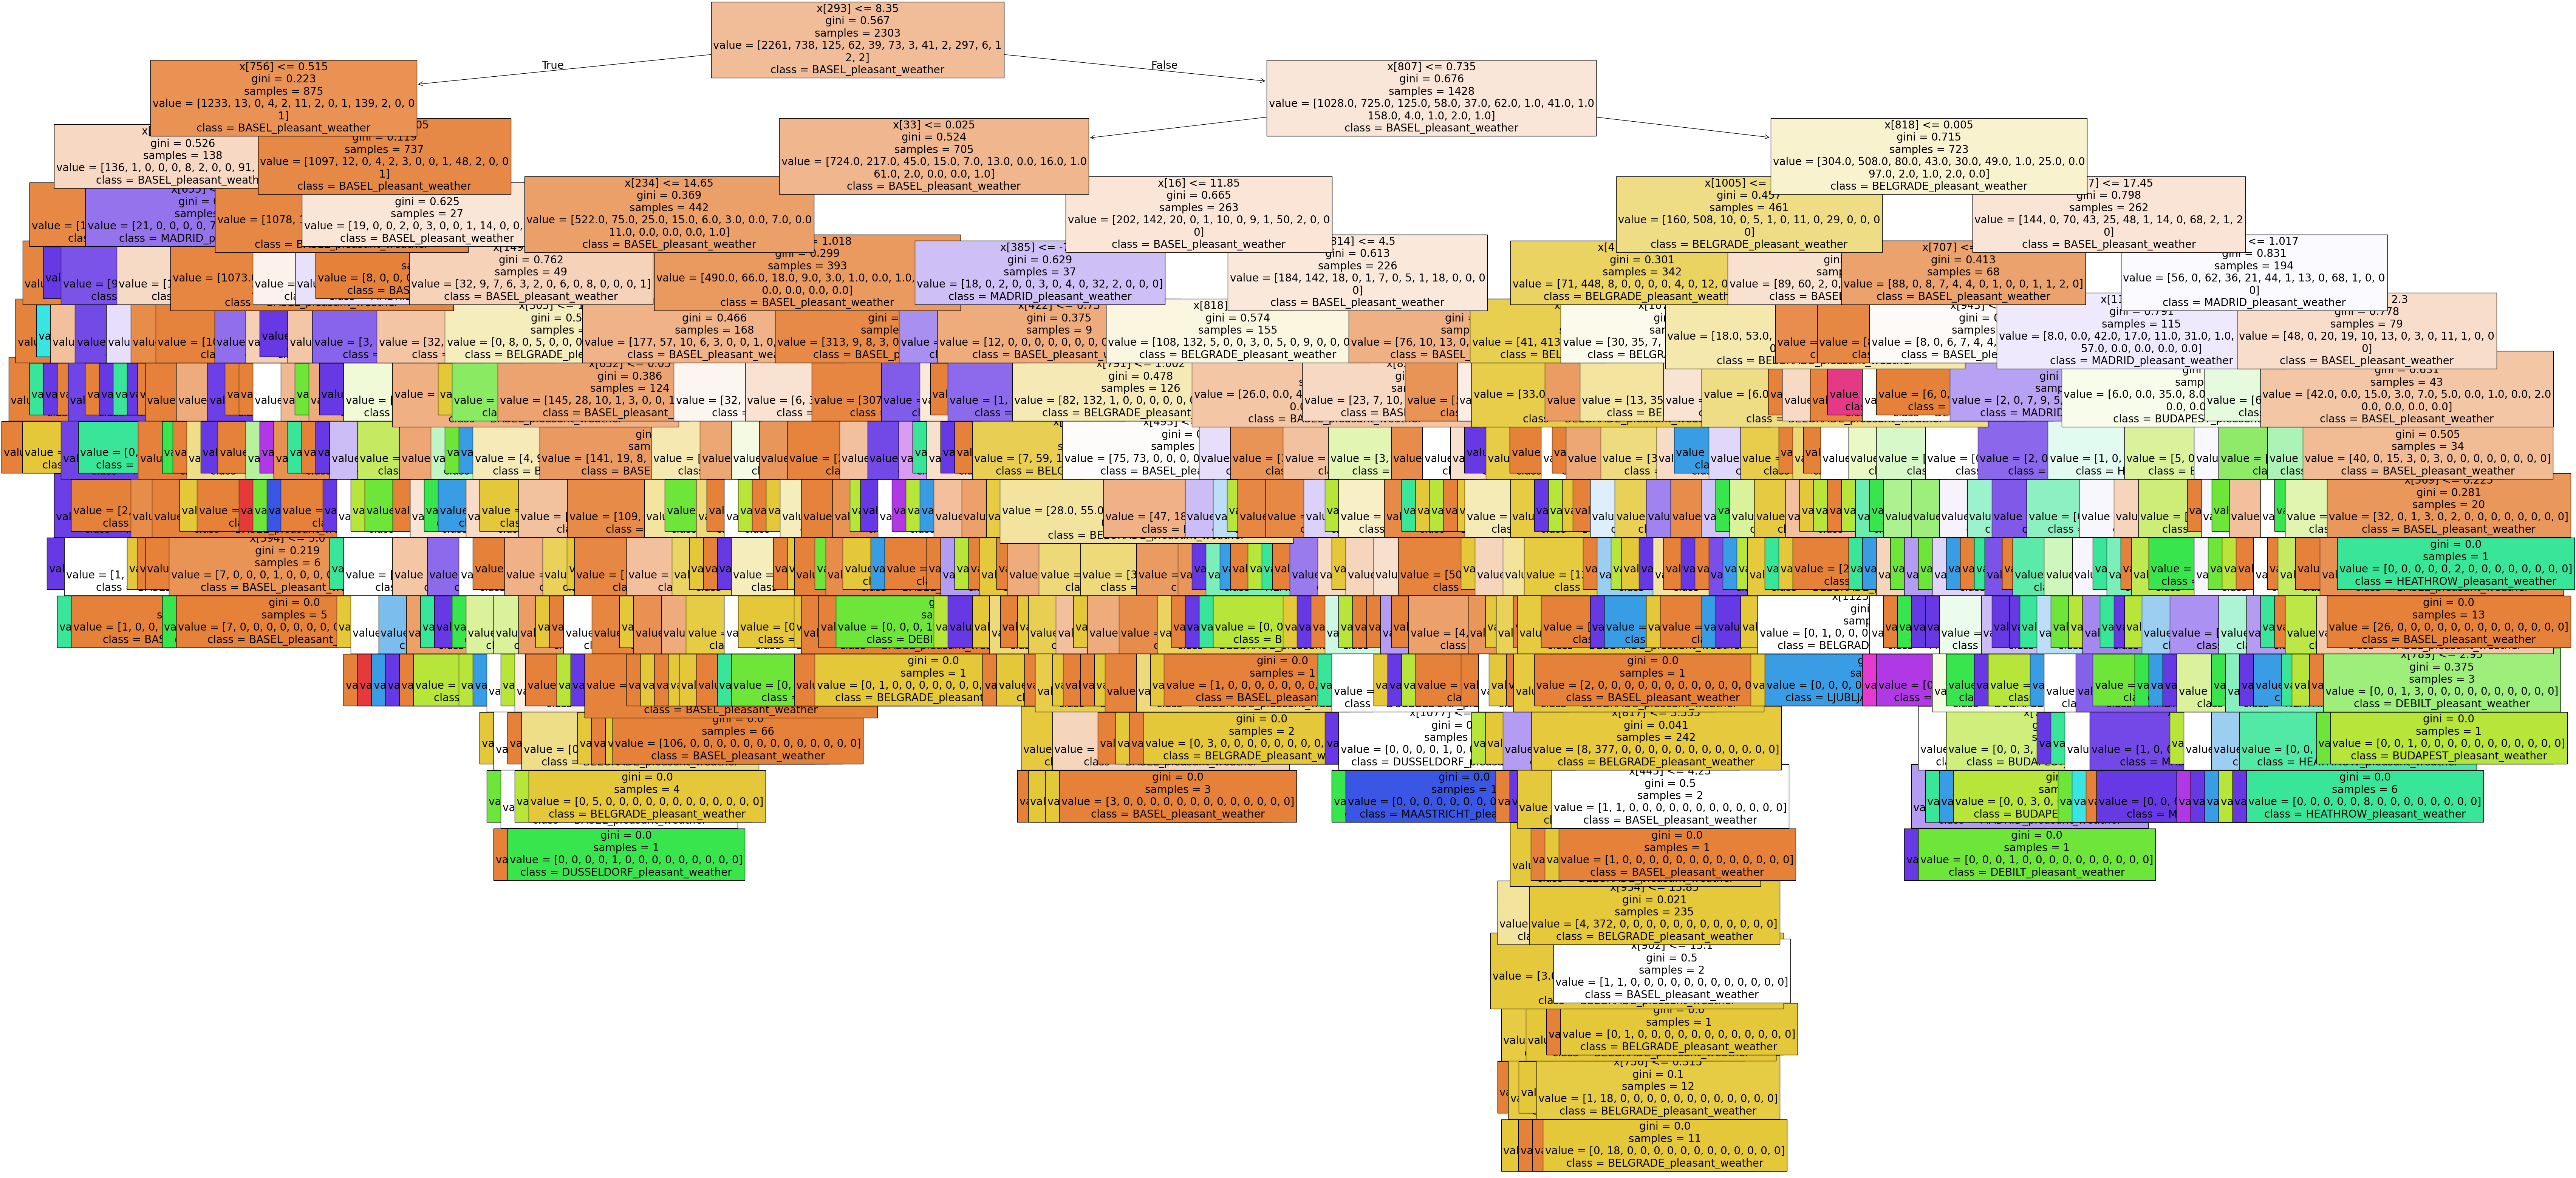

In [209]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=pls, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 
plt.show()

In [210]:
fig.savefig(f"C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Unsupervised\\decision_tree_1.png")

## Feature importance

In [211]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([4.59888225e-04, 2.97782697e-03, 1.85139785e-04, 1.84723306e-03,
       5.10083343e-04, 2.66000009e-03, 5.15410977e-03, 6.16479133e-04,
       3.05633314e-04, 2.47572113e-03, 1.68434184e-03, 4.89620220e-04,
       4.00965407e-04, 4.49069333e-04, 7.25445237e-03, 1.39386970e-03,
       2.14536852e-03, 7.55149454e-04, 1.87746285e-03, 1.66203476e-04,
       2.92145256e-04, 3.31201573e-04, 8.23928794e-04, 1.47838799e-03,
       5.52188904e-04, 5.76617796e-04, 2.76643371e-04, 4.18375330e-03,
       1.54181655e-04, 4.14414280e-04, 3.52173762e-04, 9.45518216e-04,
       3.37138082e-04, 1.65538542e-03, 3.71780646e-04, 3.17710382e-04,
       4.26905592e-04, 5.25551578e-04, 2.10907128e-04, 4.81362254e-04,
       2.29055802e-04, 5.66340430e-04, 2.65837607e-04, 3.01679136e-04,
       5.48044601e-04, 3.41601718e-04, 7.59252632e-04, 6.57369994e-05,
       4.33894842e-04, 4.15128230e-04, 5.22835621e-04, 4.72972921e-04,
       5.99505690e-04, 1.97033473e-04, 1.50640790e-03, 3.50672603e-04,
      

In [212]:
np.set_printoptions(threshold=1000)

In [213]:
# Reshaping to (-1, 1, 134) as we have 134 elements.  It seems we deleted one too many
newarray = newarray.reshape(-1, 1, 134)
print(newarray.shape)
newarray

(9, 1, 134)


array([[[4.59888225e-04, 2.97782697e-03, 1.85139785e-04, ...,
         3.24894206e-04, 4.25084379e-04, 4.12018959e-04]],

       [[2.32143821e-04, 3.52235488e-03, 1.44799972e-04, ...,
         2.07548958e-04, 3.07089109e-04, 4.62930278e-04]],

       [[2.86293723e-04, 1.90924637e-03, 7.77575766e-05, ...,
         3.91775920e-04, 5.18880985e-04, 5.73615937e-04]],

       ...,

       [[6.01153755e-04, 1.43381290e-03, 2.46135560e-05, ...,
         7.71577106e-04, 4.22292998e-04, 4.64634374e-04]],

       [[3.57623511e-04, 3.40916906e-03, 1.37204195e-04, ...,
         4.68722963e-04, 4.05956746e-04, 5.95824268e-04]],

       [[5.83568517e-04, 1.44130189e-03, 1.68777575e-04, ...,
         4.88797713e-04, 6.65637174e-04, 4.22839540e-04]]])

In [214]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([4.59888225e-04, 2.97782697e-03, 1.85139785e-04, 1.84723306e-03,
       5.10083343e-04, 2.66000009e-03, 5.15410977e-03, 6.16479133e-04,
       3.05633314e-04, 2.47572113e-03, 1.68434184e-03, 4.89620220e-04,
       4.00965407e-04, 4.49069333e-04, 7.25445237e-03, 1.39386970e-03,
       2.14536852e-03, 7.55149454e-04, 1.87746285e-03, 1.66203476e-04,
       2.92145256e-04, 3.31201573e-04, 8.23928794e-04, 1.47838799e-03,
       5.52188904e-04, 5.76617796e-04, 2.76643371e-04, 4.18375330e-03,
       1.54181655e-04, 4.14414280e-04, 3.52173762e-04, 9.45518216e-04,
       3.37138082e-04, 1.65538542e-03, 3.71780646e-04, 3.17710382e-04,
       4.26905592e-04, 5.25551578e-04, 2.10907128e-04, 4.81362254e-04,
       2.29055802e-04, 5.66340430e-04, 2.65837607e-04, 3.01679136e-04,
       5.48044601e-04, 3.41601718e-04, 7.59252632e-04, 6.57369994e-05,
       4.33894842e-04, 4.15128230e-04, 5.22835621e-04, 4.72972921e-04,
       5.99505690e-04, 1.97033473e-04, 1.50640790e-03, 3.50672603e-04,
      

In [215]:
#Trim sumarray to match signals
important = pd.Series(sumarray[:-1], index=signals).sort_values(ascending=False)
important

BELGRADE_sunshine         0.007254
MUNCHENB_cloud_cover      0.007153
BASEL_temp_mean           0.005154
MAASTRICHT_cloud_cover    0.004227
DEBILT_cloud_cover        0.004184
                            ...   
LJUBLJANA_wind_speed      0.000154
OSLO_temp_mean            0.000153
VALENTIA_humidity         0.000106
LJUBLJANA_sunshine        0.000099
HEATHROW_humidity         0.000066
Length: 133, dtype: float64

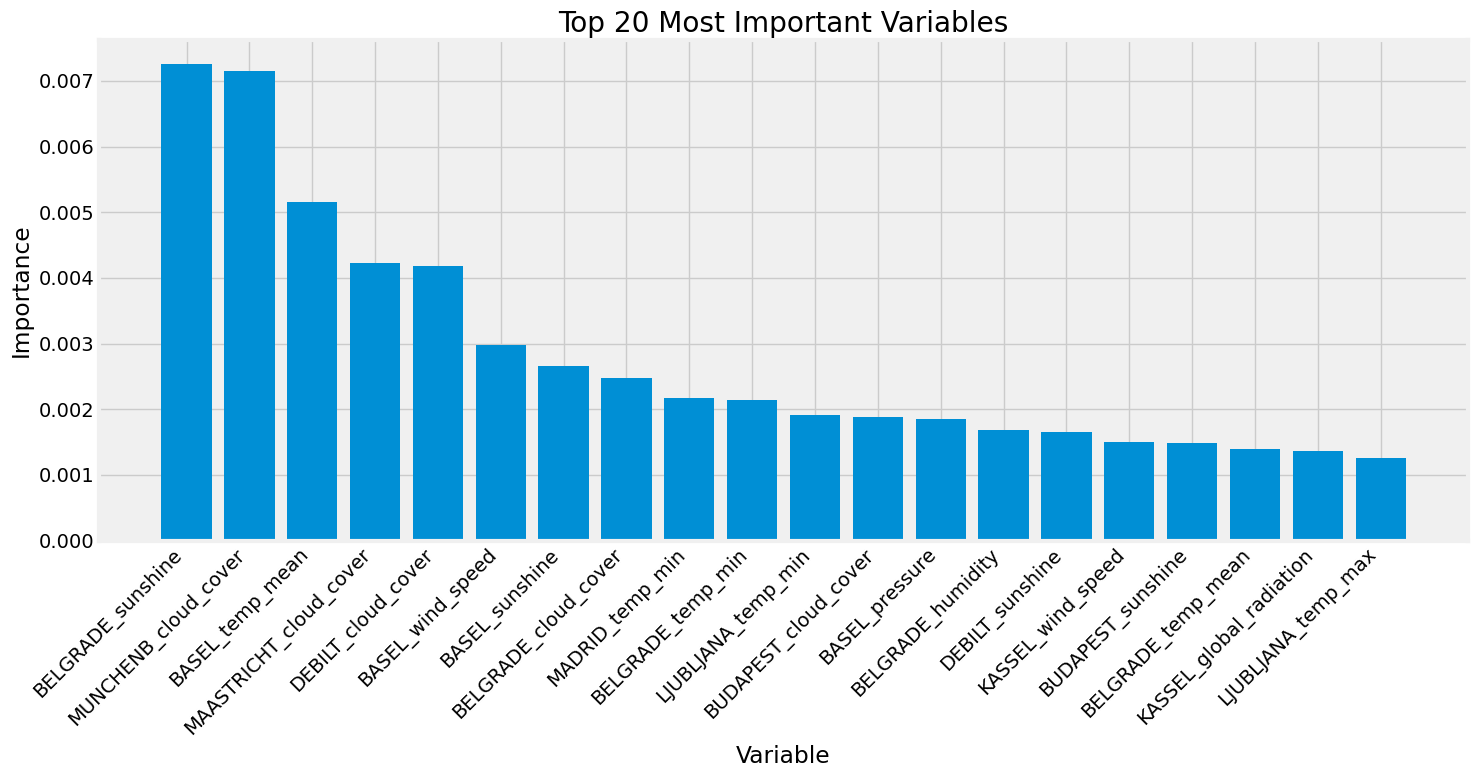


Top features and their importance scores:
BELGRADE_sunshine          0.007254
MUNCHENB_cloud_cover       0.007153
BASEL_temp_mean            0.005154
MAASTRICHT_cloud_cover     0.004227
DEBILT_cloud_cover         0.004184
BASEL_wind_speed           0.002978
BASEL_sunshine             0.002660
BELGRADE_cloud_cover       0.002476
MADRID_temp_min            0.002171
BELGRADE_temp_min          0.002145
LJUBLJANA_temp_min         0.001911
BUDAPEST_cloud_cover       0.001877
BASEL_pressure             0.001847
BELGRADE_humidity          0.001684
DEBILT_sunshine            0.001655
KASSEL_wind_speed          0.001506
BUDAPEST_sunshine          0.001478
BELGRADE_temp_mean         0.001394
KASSEL_global_radiation    0.001362
LJUBLJANA_temp_max         0.001260
dtype: float64


In [216]:
# Plotting the 20 most important variables

%matplotlib inline
import matplotlib.pyplot as plt

# Option 1: Show only top N most important variables
n_top = 20  # Adjust this number as needed
top_features = important.nlargest(n_top)

plt.figure(figsize=(15, 8))
plt.style.use('fivethirtyeight')

# Create the bar plot with top features only
x_values = list(range(len(top_features)))
plt.bar(x_values, top_features, orientation='vertical')

# Customize the plot
plt.xticks(x_values, top_features.index, rotation=45, ha='right')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title(f'Top {n_top} Most Important Variables')

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Print the top N features and their importance scores
print("\nTop features and their importance scores:")
print(top_features)